import the neccesarylibraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import zscore


Load the data

summerise statistics

Checking the quality of the data

In [44]:
# def quality_check(df, num_columns):
#   print('Missing values')
#   print(df.isnull().sum())
  
#   print('/n Negative Values')
#   for col in num_columns:
#     if (df[col] < 0).any():
#       print(f'{col} has negative values')
#   print('/n Outlines')
#   for col in num_columns:
#     z_score = (df[col] - df[col].mean())/df[col].std()
#     outliers = df[abs(z_score) > 0]
#     if not outliers.empty:
#       print(f'outlier detected in {col}')


In [45]:
# num_columns = ['GHI','DNI','DHI','ModA', 'ModB', 'WS', 'WSgust']
# for name, df in data_set.items():
#   print(f'Quality check for {name}')
#   quality_check(df,num_columns)

TimeSeriesAnalysis

In [46]:
# df.columns = df.columns.str.strip()
# df.columns = df.columns.str.lower()


Dataset: Benin
Summary Statistics Data:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

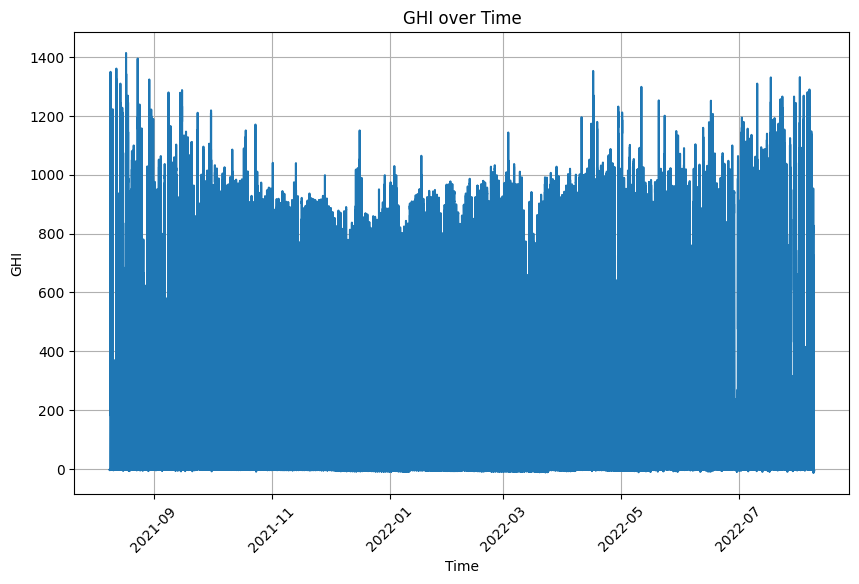

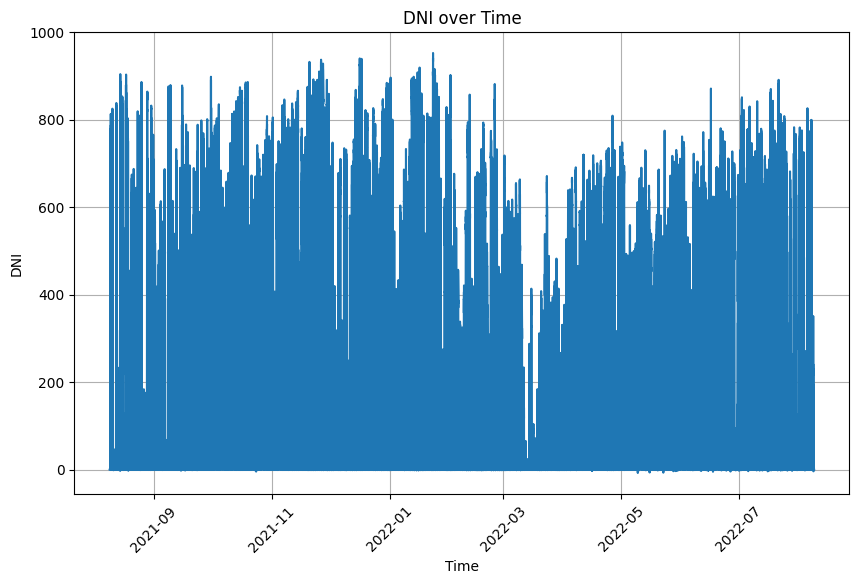

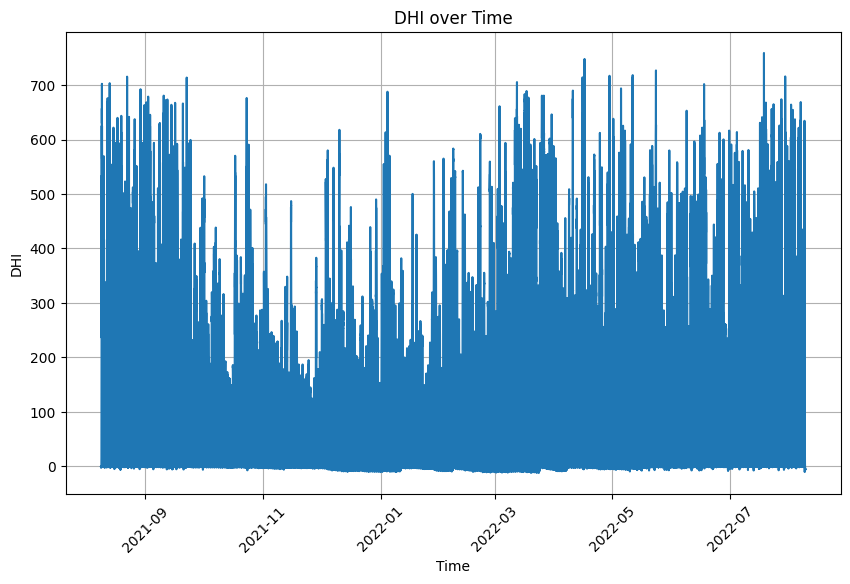

Dataset: Sierra Leone
Summary Statistics Data:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000     

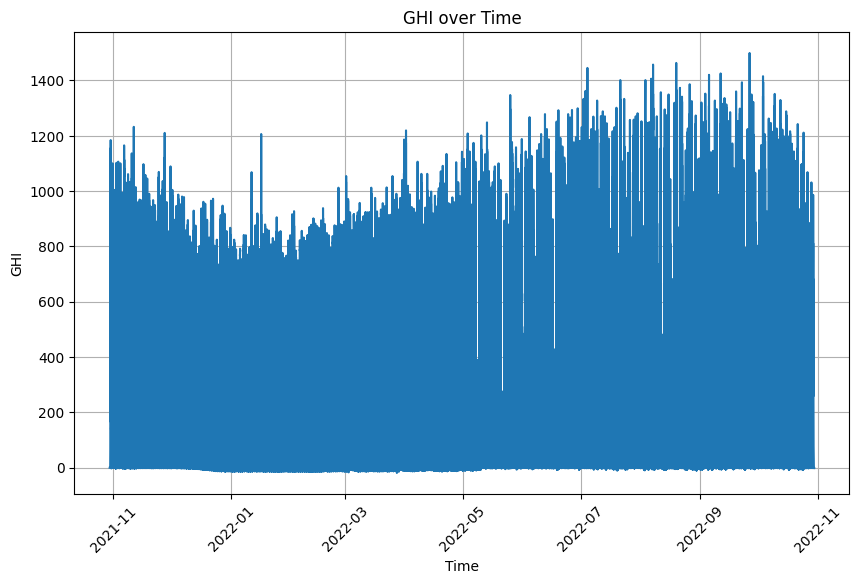

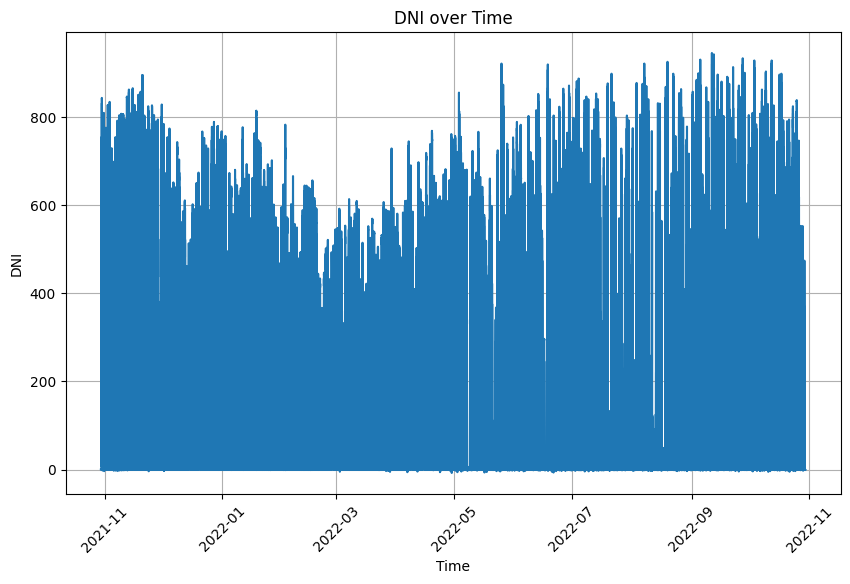

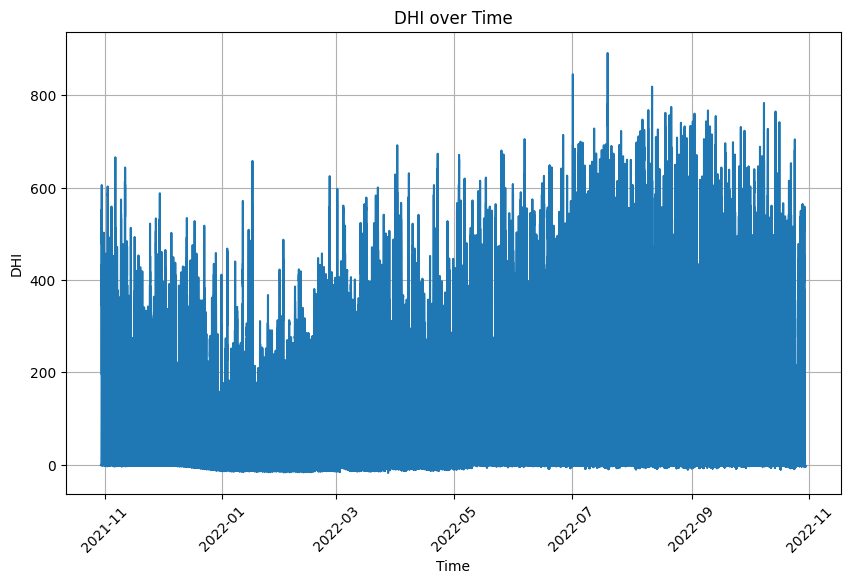

Dataset: Togo
Summary Statistics Data:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.0000

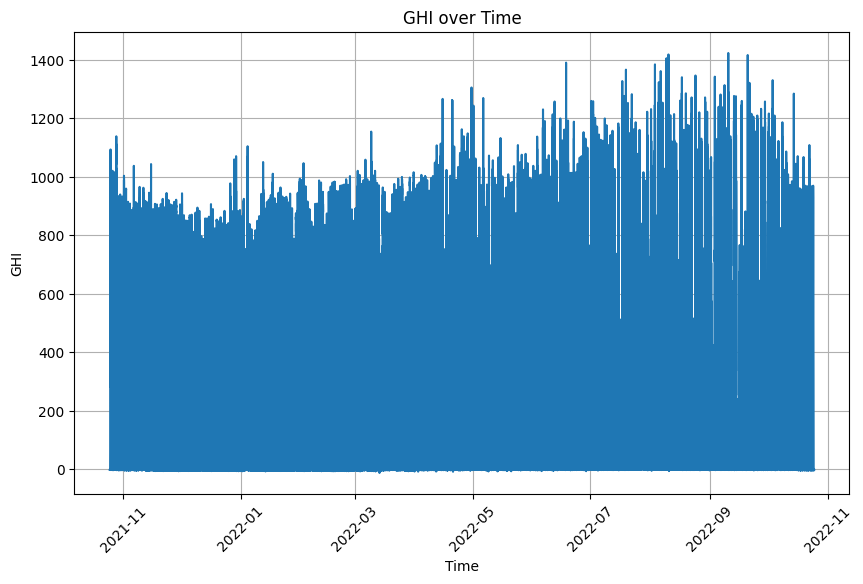

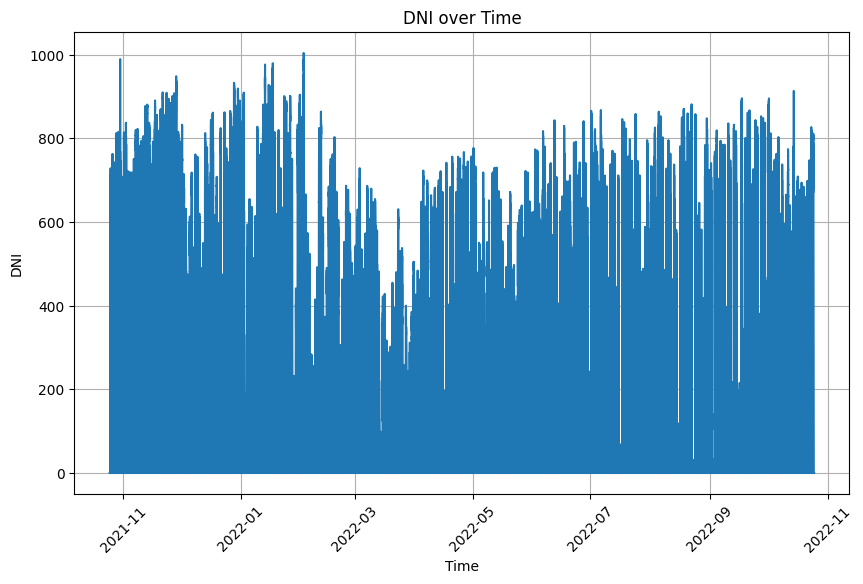

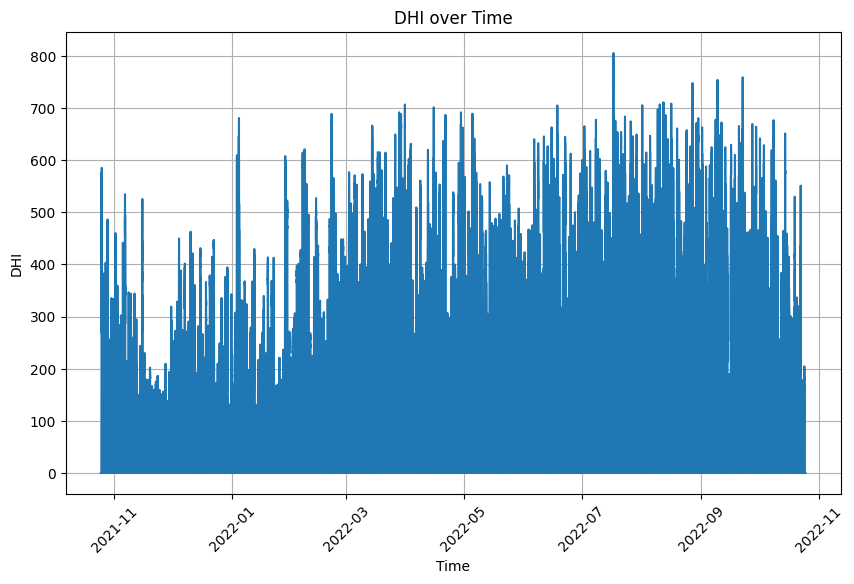

In [ ]:
# Function for Summary Statistics
def summary_statistics(df):
    print("Summary Statistics Data:")
    print(df.describe())  # Calculate summary statistics for all columns
    print("Columns:", df.columns)  # Print column names

# Function for Data Quality Check (Missing values, negative values, etc.)
def quality_check(df):
    print("Quality Check:")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values:\n", missing_values)
    
    # Check for negative values in specific columns (GHI, DNI, DHI)
    negative_values = df[['GHI','DNI','DHI']].lt(0).sum()
    print("Negative values:\n", negative_values)
    
    # Check for any outliers (using a basic threshold for demonstration)
    print("\nOutlier detection (if value > 1000 for GHI, DNI, DHI):")
    outliers = df[['ModA', 'ModB','WS', 'WSgust']].gt(1000).sum()
    print(outliers)

# Function for Time Series Analysis (e.g., plot GHI, DNI, DHI over time)
def time_series_analysis(df, date_column, columns_to_plot):
    print(f"\nTime Series Analysis for {date_column} and {', '.join(columns_to_plot)}:")
    
    # Convert the date_column to datetime and set it as index
    df[date_column] = pd.to_datetime(df[date_column])
    df.set_index(date_column, inplace=True)
    
    # Plot the specified columns over time
    for col in columns_to_plot:
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df[col])
        plt.title(f"{col} over Time")
        plt.xlabel("Time")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# Sample data (replace with your actual dataset loading)
benin_data = pd.read_csv('C:/Users/sewasew tadele/Desktop/10acadamy/10Acadamy/files/benin-malanville.csv')
sierra_leone_data = pd.read_csv('C:/Users/sewasew tadele/Desktop/10acadamy/10Acadamy/files/sierraleone-bumbuna.csv')
togo_data = pd.read_csv('C:/Users/sewasew tadele/Desktop/10acadamy/10Acadamy/files/togo-dapaong_qc.csv')


# Data set dictionary
data_set = {
    'Benin': benin_data,
    'Sierra Leone': sierra_leone_data,
    'Togo': togo_data
}

# Loop through the datasets and call the functions
for name, df in data_set.items():
    print(f"Dataset: {name}")
    
    # Call Summary Statistics
    summary_statistics(df)
    
    # Call Data Quality Check
    quality_check(df)
    
    # Call Time Series Analysis (example: using 'Timestamp' as the date column and plotting 'GHI', 'DNI', 'DHI')
    time_series_analysis(df, 'Timestamp', ['GHI', 'DNI', 'DHI'])
